In [30]:
using Plots
using CSV
using Plots
using DataFrames
using Polynomials



┌ Info: Precompiling Polynomials [f27b6e38-b328-58d1-80ce-0feddd5e7a45]
└ @ Base loading.jl:1189


In [105]:
# Ex 1
function naive_multiplication(A, B)
    C = zeros(Float64, size(A, 1), size(B, 2))
    for i=1:size(A, 1)
        for j=1:size(B, 2)
            for k=1:size(A, 2)
                C[i,j]=C[i, j] + A[i, k] * B[k, j] 
            end
        end
    end
    C
end

naive_multiplication (generic function with 1 method)

In [19]:
function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(B,2)
    for k=1:size(A,2)
        for i=1:size(A,1)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

In [101]:
x_axis=1:100:1000

y_naive = []
y_better = []
y_blas = []

for x in x_axis
    append!(y_naive, @elapsed naive_multiplication(rand(x, x), rand(x, x)))
    append!(y_better, @elapsed better_multiplication(rand(x, x), rand(x, x)))
    append!(y_blas, @elapsed rand(x, x)*rand(x, x))
end
    
scater(x_axis, [y_naive, y_better, y_blas], labels = ["naive" "better" "blas"], xlabel = "size", ylabel = "time [s]")

UndefVarError: UndefVarError: scater not defined

In [106]:
# Ex 2
;less main.c

#include <stdio.h>
#include <gsl/gsl_blas.h>
#include <time.h>
#include <stdlib.h>
#include <time.h>
#include <ntsid.h>

void naive(double **A, double **B, double **C, int size_a, int size_b, int size_c) {

    for (int i = 0; i < size_a; i++) {
        for (int j = 0; j < size_c; j++) {
            for (int k = 0; k < size_b; k++) {
                C[i][j] = C[i][j] + A[i][k] * B[k][j];
            }
        }
    }
}

void better(double **A, double **B, double **C, int size_a, int size_b, int size_c) {

    for (int i = 0; i < size_a; i++) {
        for (int k = 0; k < size_b; k++) {
            for (int j = 0; j < size_c; j++) {
                C[i][j] = C[i][j] + A[i][k] * B[k][j];
            }
        }
    }
}

void gsl_m(double *A, double *B, double *C, int size_a, int size_b, int size_c, int p) {

    gsl_matrix_view AM = gsl_matrix_view_array(A, size_a, size_b);
    gsl_matrix_view BM = gsl_matrix_view_array(B, size_c, p);
    gsl_matrix_view CM = gsl_matrix_view_array(C, siz

In [4]:
;gcc -Wall -o main.out main.c -lgsl -lgslcblas -lm

In [8]:
;./main.out

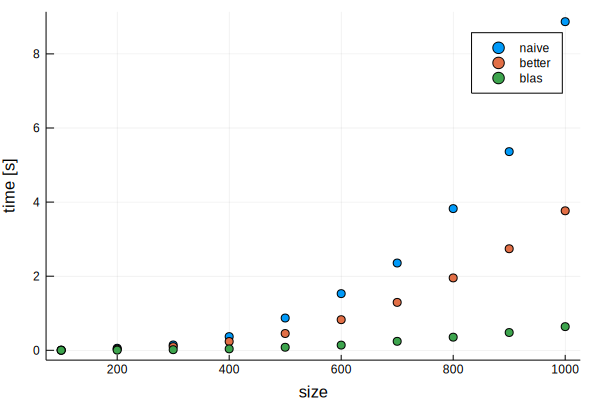

In [21]:
using CSV
using Plots
using DataFrames

data = CSV.read("res.csv")

scatter(data[:size], [data[:naive], data[:better], data[:blas]], 
    labels =["naive" "better" "blas"], 
    xlabel = "size", 
    ylabel = "time [s]")

In [38]:
# Ex 3
j_fit_naive = polyfit(x_axis,y_naive,3)
c_fit_naive = polyfit(x_axis,data[:naive],3)
j_fit_better = polyfit(x_axis,y_better,3)
c_fit_better = polyfit(x_axis,data[:better],3)
j_fit_blas = polyfit(x_axis,y_blas,3)
c_fit_blas = polyfit(x_axis,data[:blas],3)

Poly(0.005191082553416631 - 0.00011733419562296012*x + 6.905561707459196e-7*x^2 + 2.4687470862470975e-10*x^3)

In [86]:
function drawer(p, res, title)
    xs = range(0,stop=1000,length=100)
    ys = map(x -> polyval(p, x), xs);
    scatter(x_axis, res, label = title, xlabel = "size", size = (600, 500),  ylabel = "time [s]")
    plot!(xs, ys, label = title, xlabel = "size", linewidth=4, dpi = 100,  ylabel = "time [s]")
end

drawer (generic function with 1 method)

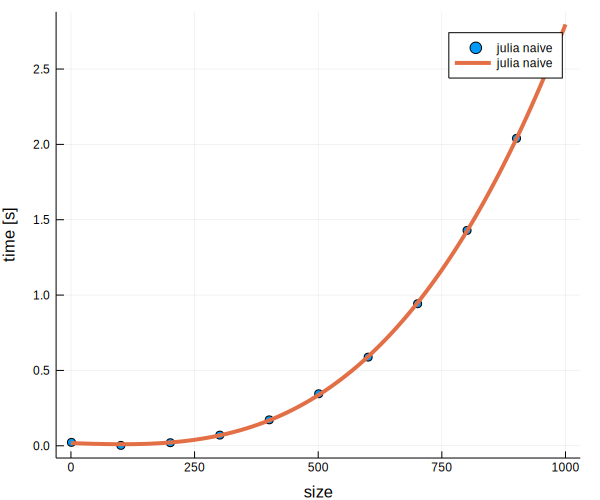

In [88]:
drawer(j_fit_naive, y_naive, "julia naive")

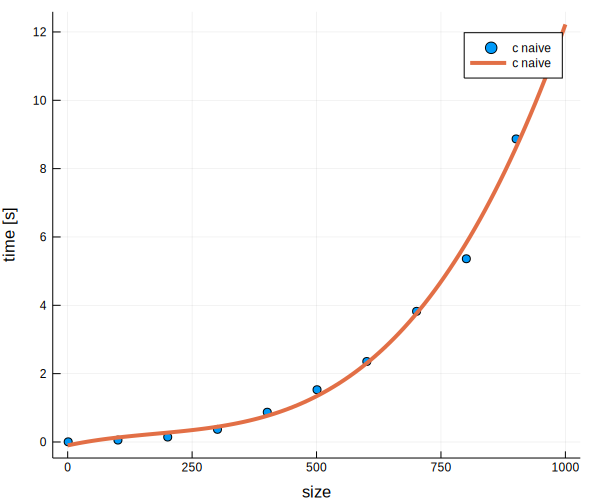

In [89]:
drawer(c_fit_naive, data[:naive], "c naive")

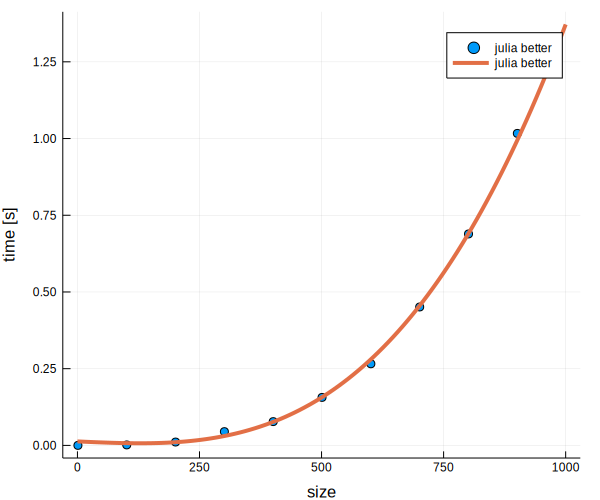

In [98]:
drawer(j_fit_better, y_better, "julia better")

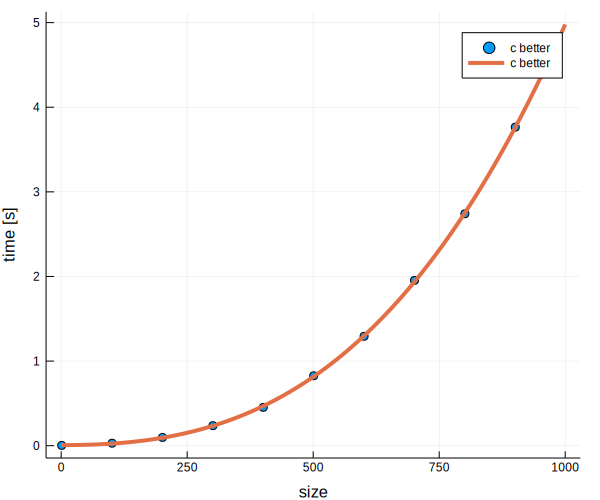

In [92]:
drawer(c_fit_better, data[:better], "c better")

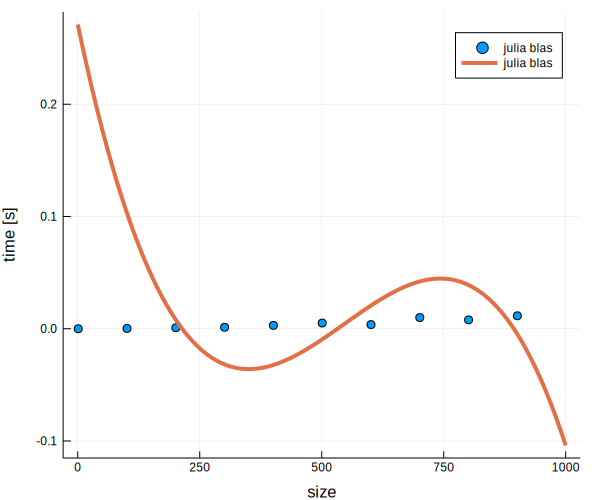

In [99]:
drawer(j_fit_blas, y_blas, "julia blas")
# Overfitted

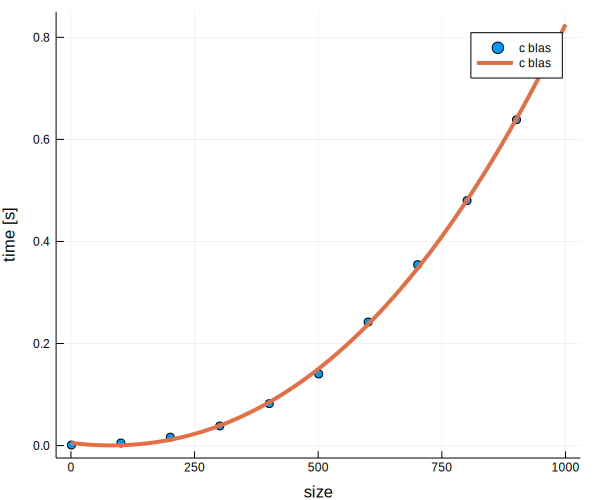

In [95]:
drawer(c_fit_blas, data[:blas], "c blas")

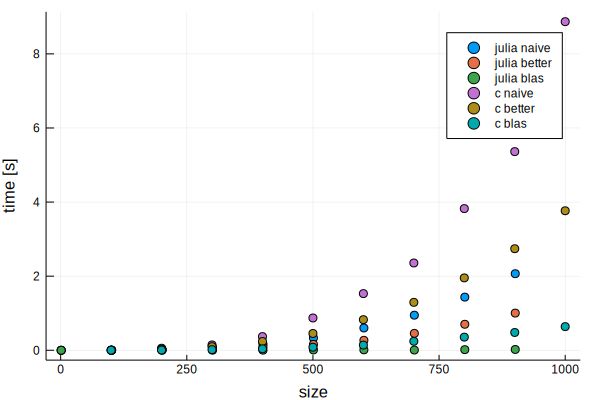

In [104]:
# Ex 4. Blas in Julia appears to be the fastest one
scatter(x_axis, [y_naive, y_better, y_blas], labels = ["julia naive" "julia better" "julia blas"], xlabel = "size", ylabel = "time [s]")
scatter!(data[:size], [data[:naive], data[:better], data[:blas]], 
    labels =["c naive" "c better" "c blas"], 
    xlabel = "size", 
    ylabel = "time [s]")